> ## ** Imports and data loading**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pytz import timezone
import pytz

%matplotlib inline

plt.style.use('fivethirtyeight')
train = pd.read_csv('../input/SolarPrediction.csv')

## **Initial observations**

In [2]:
train.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [3]:
train.shape

(32686, 11)

In [4]:
train.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet'],
      dtype='object')

In [5]:
train.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

## **Data preprocessing**

### **UNIX Time to Datetime Transformation**

In [6]:
#hawaii = timezone('Pacific/Honolulu')

# Creamos una copia del original
train_origial = train.copy()
df = train.copy()

train_origial.index = pd.to_datetime(df['UNIXTime'], unit='s')
#print(train_origial.index)
#df.index= df.index.tz_localize(pytz.utc).tz_convert(hawaii)

train['DateTime'] = train_origial.index
train_origial['DateTime'] = train_origial.index 
train.head()


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DateTime
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-30 09:55:26
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-30 09:50:23
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-30 09:45:26
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-30 09:40:21
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-30 09:35:24


In [7]:
train_origial.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DateTime
UNIXTime,,,,,,,,,,,,
2016-09-30 09:55:26,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,2016-09-30 09:55:26
2016-09-30 09:50:23,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,2016-09-30 09:50:23
2016-09-30 09:45:26,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,2016-09-30 09:45:26
2016-09-30 09:40:21,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,2016-09-30 09:40:21
2016-09-30 09:35:24,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,2016-09-30 09:35:24


### **Generation DataFrame of Radiation**

In [8]:
train_radiation = train.drop(['UNIXTime', 'Data', 'Time', 'Temperature','TimeSunRise', 'TimeSunSet',
                         'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed' ], axis=1)
#print(train_radiation)

### **Time features**

In [9]:
for i in (train_radiation, train_origial):
    i['year'] = i.DateTime.dt.year
    i['month'] = i.DateTime.dt.month
    i['day'] = i.DateTime.dt.day
    i['Hour'] = i.DateTime.dt.hour

In [10]:
train_radiation['Day of week'] = train_radiation['DateTime'].dt.dayofweek
temp_rad = train_radiation['DateTime']


In [11]:
# Funcion para saber si es fin de semana o no, poco relevante ...
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
temp2 = train_radiation['DateTime'].apply(applyer)
train_radiation['weekend'] = temp2

### **Change Index for datetime data type**

In [12]:
train_radiation.index = train_radiation['DateTime']

### **Preprocessing result**

In [13]:
train_radiation.head()

,Radiation,DateTime,year,month,day,Hour,Day of week,weekend
DateTime,,,,,,,,
2016-09-30 09:55:26,1.21,2016-09-30 09:55:26,2016,9,30,9,4,0
2016-09-30 09:50:23,1.21,2016-09-30 09:50:23,2016,9,30,9,4,0
2016-09-30 09:45:26,1.23,2016-09-30 09:45:26,2016,9,30,9,4,0
2016-09-30 09:40:21,1.21,2016-09-30 09:40:21,2016,9,30,9,4,0
2016-09-30 09:35:24,1.17,2016-09-30 09:35:24,2016,9,30,9,4,0


## **Radiation Analysis and Data Visualization**

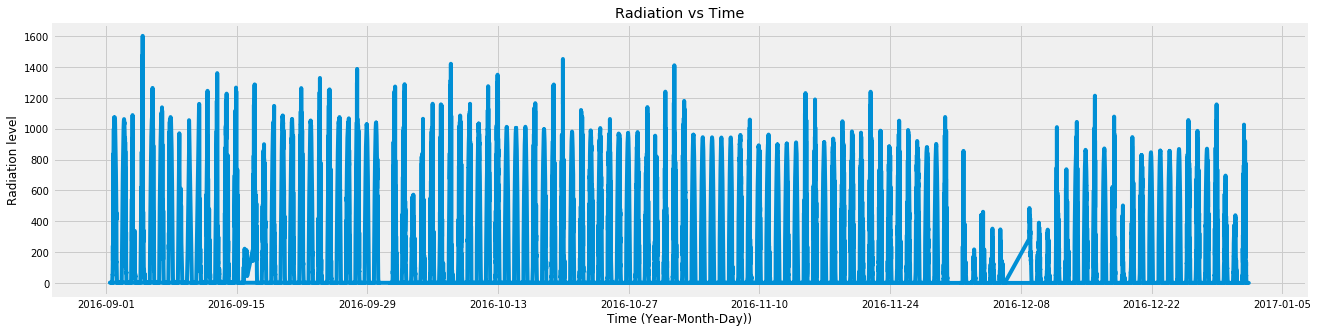

In [14]:
df_rad = train_radiation.drop('DateTime', 1)
ts = df_rad['Radiation']
plt.figure(figsize= (20,5))
plt.title('Radiation vs Time')
plt.xlabel('Time (Year-Month-Day))')
plt.ylabel('Radiation level')
plt.plot(ts)

### **Clean index**

In [15]:
train_radiation['Date']=pd.to_datetime(train_radiation.DateTime).dt.strftime('%Y-%m-%d')
train_radiation.index = train_radiation.Date
train_radiation.head()

,Radiation,DateTime,year,month,day,Hour,Day of week,weekend,Date
Date,,,,,,,,,
2016-09-30,1.21,2016-09-30 09:55:26,2016,9,30,9,4,0,2016-09-30
2016-09-30,1.21,2016-09-30 09:50:23,2016,9,30,9,4,0,2016-09-30
2016-09-30,1.23,2016-09-30 09:45:26,2016,9,30,9,4,0,2016-09-30
2016-09-30,1.21,2016-09-30 09:40:21,2016,9,30,9,4,0,2016-09-30
2016-09-30,1.17,2016-09-30 09:35:24,2016,9,30,9,4,0,2016-09-30


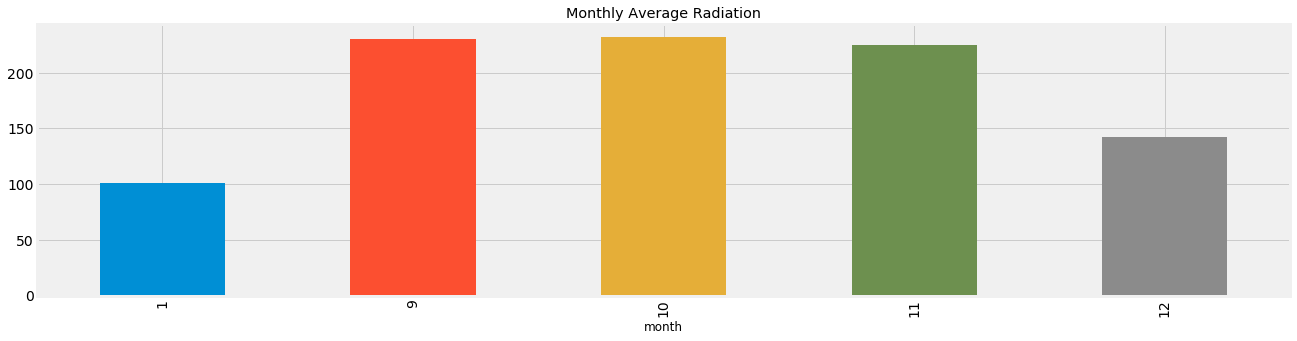

In [16]:
train_radiation.groupby('month')['Radiation'].mean().plot.bar(figsize = (20,5),
                                                              title = 'Monthly Average Radiation',
                                                              fontsize = 14)

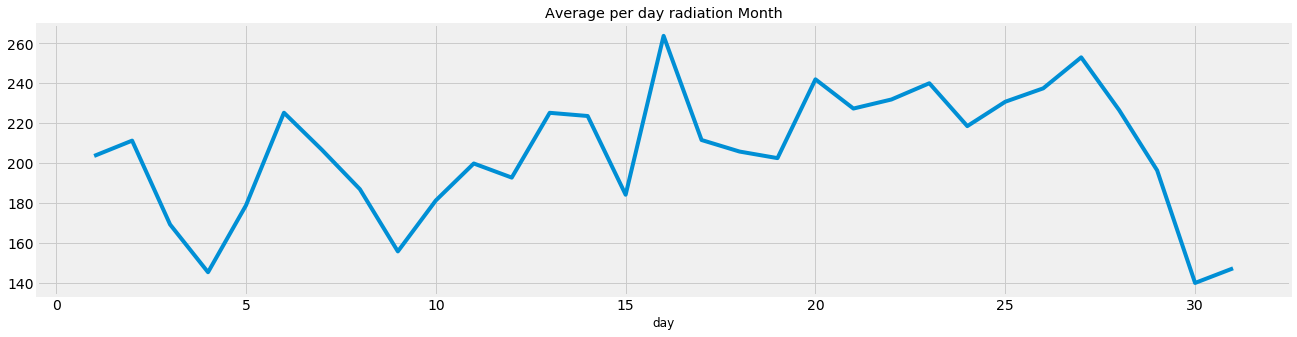

In [17]:
temp = train_radiation.groupby(['day'])['Radiation'].mean()
temp.plot(figsize = (20,5), title = "Average per day radiation Month", fontsize = 14)

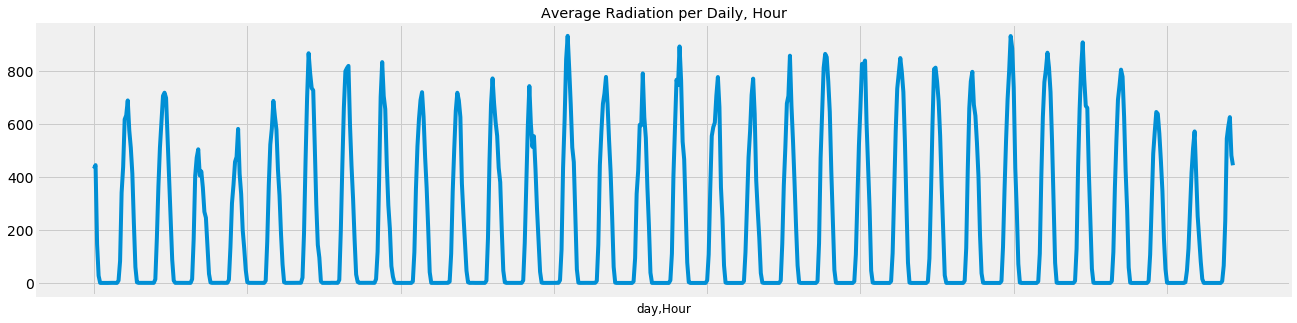

In [18]:
temp = train_radiation.groupby(['day', 'Hour'])['Radiation'].mean()
temp.plot(figsize = (20,5), title = "Average Radiation per Daily, Hour", fontsize = 14)

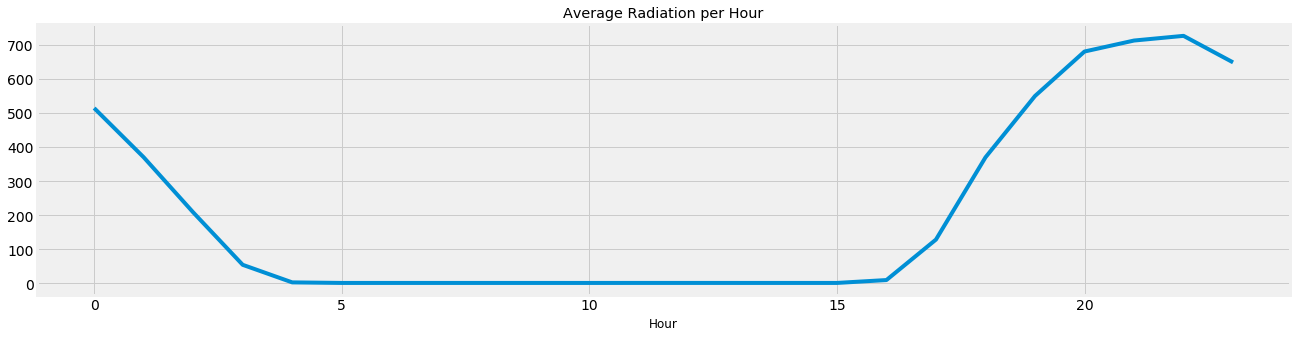

In [19]:
temp = train_radiation.groupby(['Hour'])['Radiation'].mean()
temp.plot(figsize = (20,5), title = "Average Radiation per Hour", fontsize = 14)

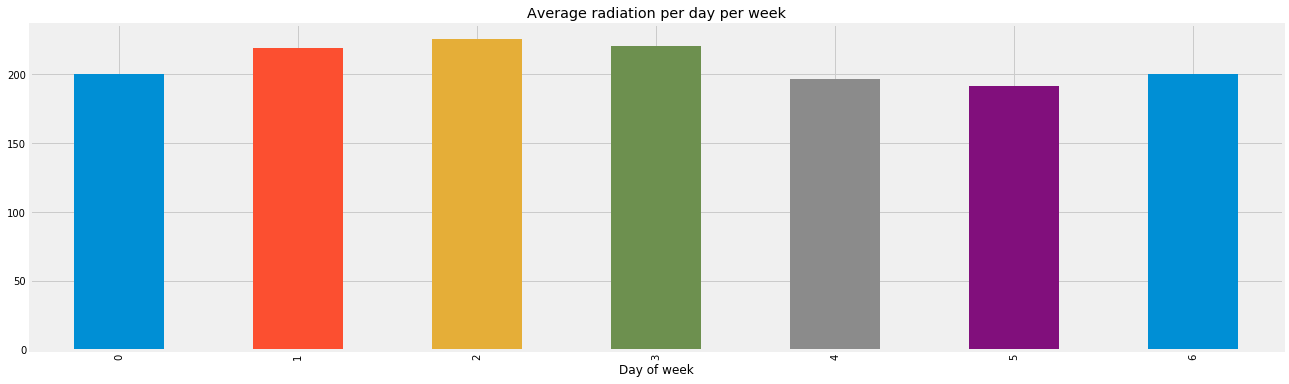

In [20]:
train_radiation.groupby('Day of week')['Radiation'].mean().plot.bar(figsize = (20,6),
                                                                   title = 'Average radiation per day per week')

## **Visualizacion descompuesta por peridos**

In [21]:
train_radiation['Timestamp'] = pd.to_datetime(train_radiation.DateTime, format = '%d-%m-%y %H:%M')
train_radiation.index = train_radiation.Timestamp

#Hourly
hourly = train_radiation.resample('H').mean()

#Daily
daily = train_radiation.resample('D').mean()

#Weekly
weekly = train_radiation.resample('W').mean()
    
#Monthly
monthly = train_radiation.resample('M').mean()

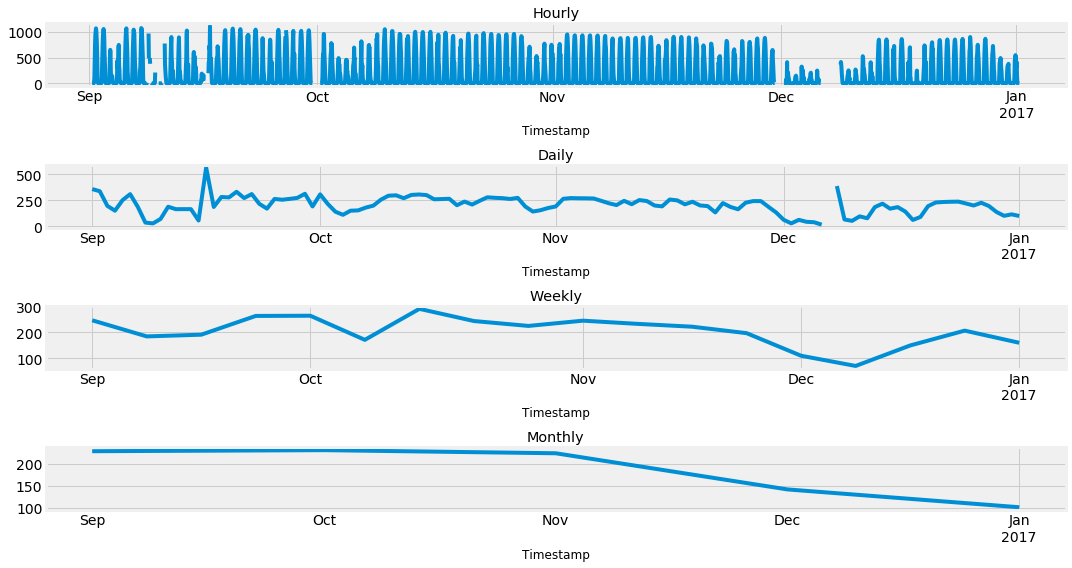

In [22]:
ig,axs = plt.subplots(4,1)

hourly.Radiation.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Radiation.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Radiation.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Radiation.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])
plt.tight_layout()

## **Transformation and visualization of regular data**

It can be seen that the most regular data is between October and the end of November beginning of December. Since if we see the graphs above, between December and January there are missing dataframe data, and the same happens in September, so these ranges of analysis are discarded.

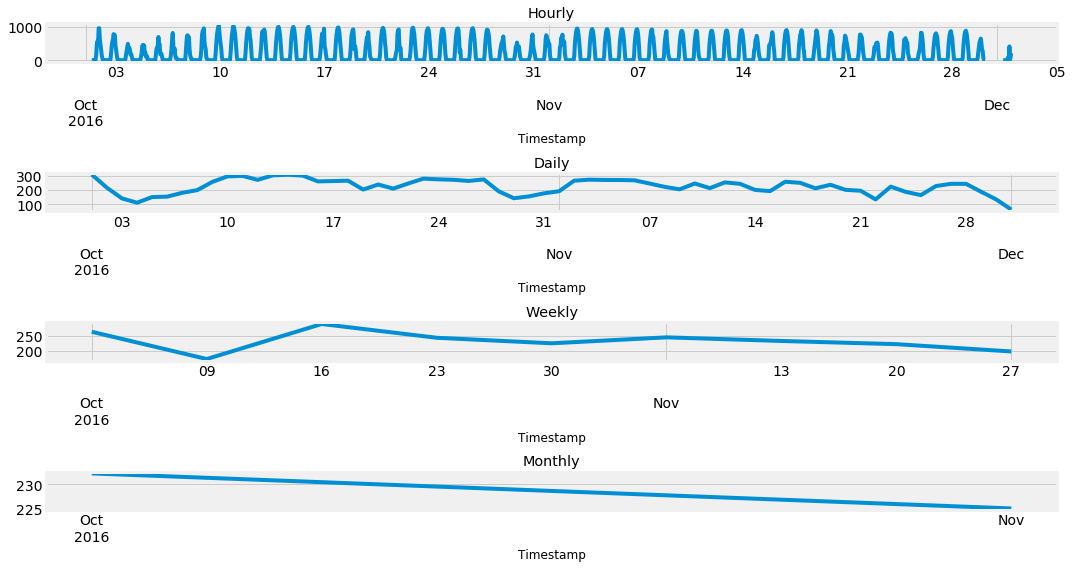

In [23]:
From = '2016-10-01'
To   = '2016-12-01'

hourly = hourly.loc[From:To,:]
daily = daily.loc[From:To,:]
weekly = weekly.loc[From:To,:] 
monthly = monthly.loc[From:To,:] 

ig,axs = plt.subplots(4,1)
hourly.Radiation.plot(figsize = (15,8), title = "Hourly", fontsize = 14, ax = axs[0])
daily.Radiation.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[1])
weekly.Radiation.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[2])
monthly.Radiation.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[3])
plt.tight_layout()

## **Look at stationarity**

It is assumed that the data of the underlying time series are stationary. This assumption gives us some ** nice ** statistical properties that allow us to use several models for forecasting.

Stationary is a statistical assumption that a time series has:

  - __Media constant__
  - __Constant balance__
  - __The autocovariedad does not depend on the time__

In short, if we use past data to predict future data, we must assume that the data will follow the same general trends and patterns as in the past. This general statement is valid for most training data and modeling tasks.

Sometimes we need to transform the data to make it stationary. However, this transformation then questions whether these data are really stationary and can be modeled using these techniques.

Source: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/

### **Stationary series test function**

In [24]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(df, ts):
    # Determining rolling statics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    # Plot rolling statistics
    orig = plt.plot(df[ts], color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red' , label = 'Promedio')
    std = plt.plot(rolstd, color = 'black', label = 'Desviacion Estandar')
    
    plt.legend(loc = 'best')
    plt.title('Promedio y Desviacion Estandar para %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    
    # Perform Dickey-Fuller test:
    # Null Hypothesis (H_0): time series is not stationary
    # Alternate Hypothesis (H_1): time series is stationary
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

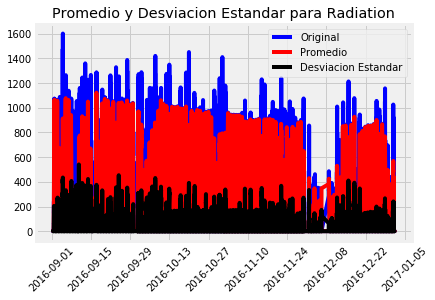

Results of Dickey-Fuller Test:
Test Statistic                   -23.773759
p-value                            0.000000
# Lags Used                       45.000000
Number of Observations Used    32640.000000
Critical Value (1%)               -3.430550
Critical Value (5%)               -2.861629
Critical Value (10%)              -2.566817
dtype: float64


In [25]:
test_stationarity(df = train_radiation, ts = 'Radiation')

## **Hypothesis**

### What does the Dickey-Fuller Test tell us?

This is one of the statistical tests to verify the stationarity. Here the null hypothesis is that the time series is not stationary. The results of the tests include a test statistic (test statistic) and some critical values for the difference confidence levels. If the "Test Statistic" is smaller than the "Critical Value 1%", the null hypothesis is rejected, therefore the series is stationary.

In summary,

 Critical-Value = cv = -3.43 |
 Test Statistic = ts = -23.77

* H0: It is not stationary; ts> cv
* H1: It is stationary; ts <cv

Therefore, H0 is rejected, which indicates that the series ** is stationary **.
 
Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

## **Predictions**

### **Imports**

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

### **Divide data for training and validation**

In [27]:
_train = hourly.loc['2016-10-02':'2016-11-13',:]
valid = hourly.loc['2016-11-14': '2016-11-28',:]

In [28]:
_train.head()
_train.shape

(1032, 7)

In [29]:
valid.head()
valid.shape

(360, 7)

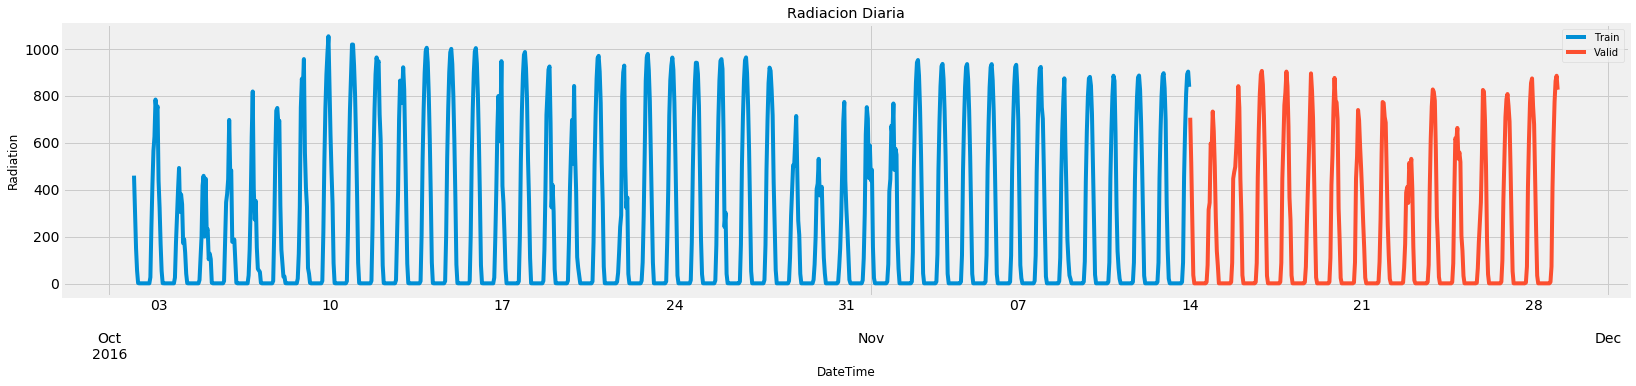

In [30]:
_train.Radiation.plot(figsize=(25,5), title = 'Radiacion Diaria', fontsize=14, label='Train')
valid.Radiation.plot(figsize=(25,5), title = 'Radiacion Diaria', fontsize=14, label='Valid')
plt.xlabel('DateTime')
plt.ylabel('Radiation')
plt.legend(loc = 'best')

### **Decomposition by season**

<Figure size 1600x800 with 0 Axes>

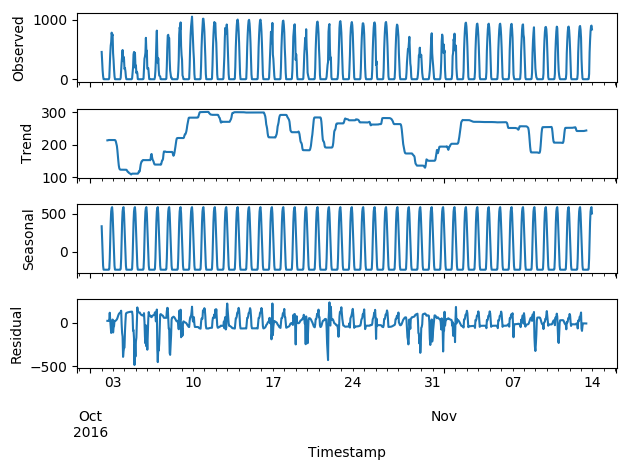

In [31]:
plt.style.use('default')
plt.figure(figsize = (16,8))
sm.tsa.seasonal_decompose(_train.Radiation).plot()
result = sm.tsa.stattools.adfuller(_train.Radiation)
plt.show()

### **Naive Approach**

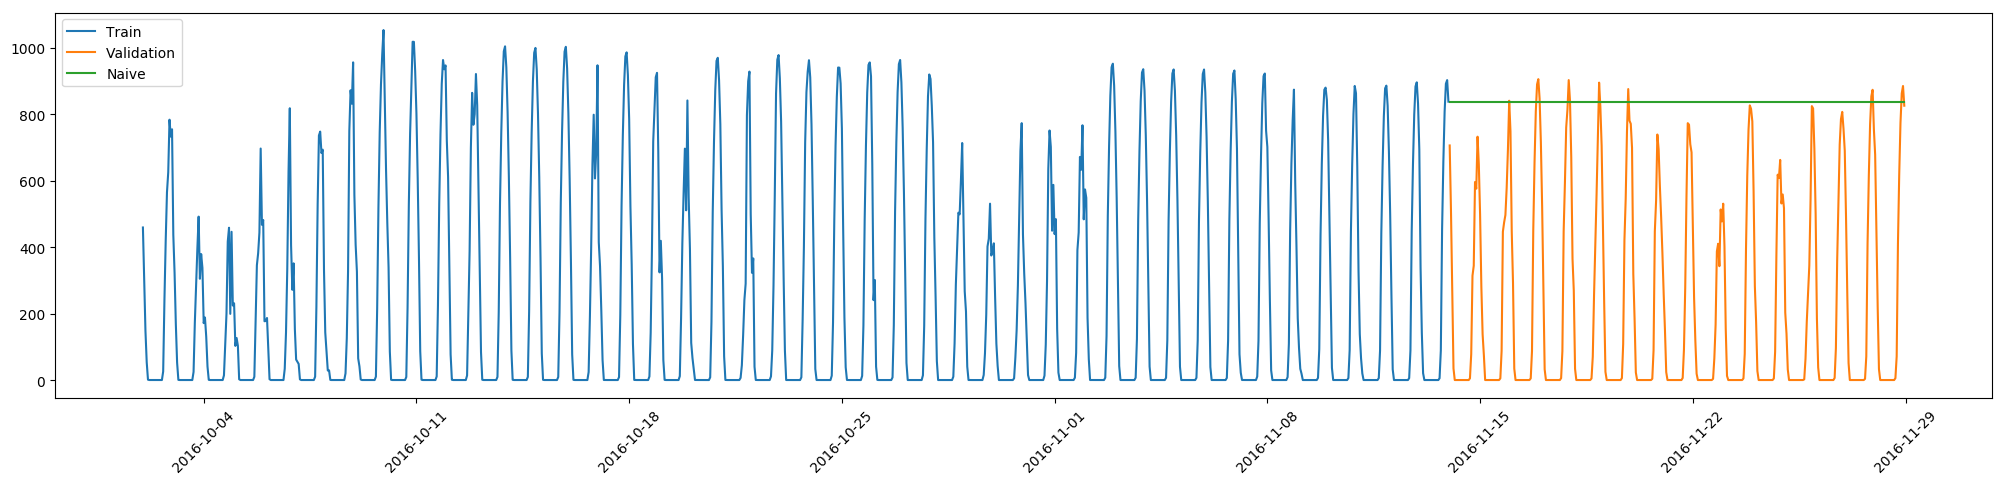

In [32]:
dd = np.asarray(_train.Radiation)
y_hat =valid.copy()
y_hat['naive'] = dd[len(dd)- 1]
plt.figure(figsize = (25,5))
plt.plot(_train.index, _train['Radiation'],label = 'Train')
plt.plot(valid.index, valid['Radiation'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.tick_params(axis = 'x', rotation = 45)

####  ** Error RMS for Naive Approach**

In [33]:
rmse = sqrt(mean_squared_error(valid['Radiation'], y_hat['naive']))
rmse

691.6822980341612

### **Holt Linear**

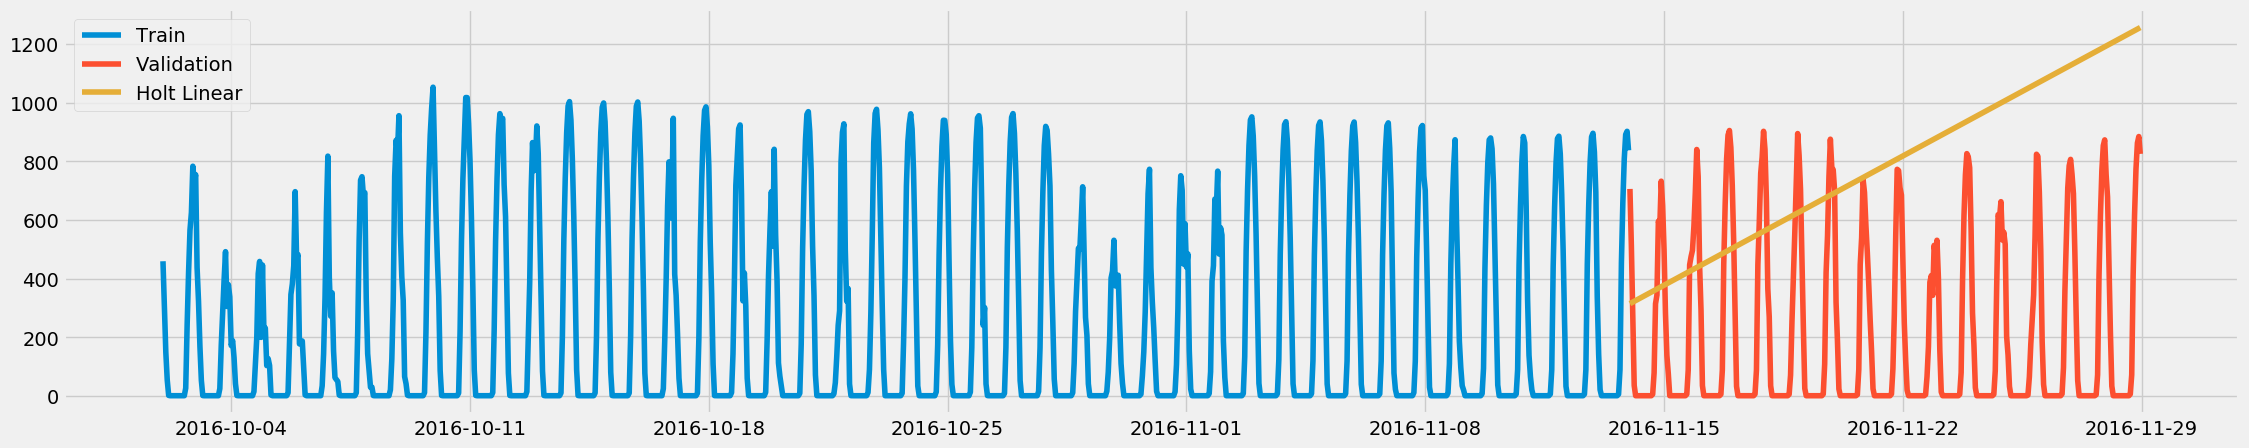

In [34]:
y_hat_holt = valid.copy()
fit1 = Holt(np.asarray(_train['Radiation'])).fit(smoothing_level = 0.01, smoothing_slope = 0.1)
y_hat_holt['Holt_linear'] = fit1.forecast(len(valid))
plt.style.use('fivethirtyeight')
plt.figure(figsize=(25,5))
plt.plot(_train.index, _train['Radiation'],label = 'Train')
plt.plot(valid.index, valid['Radiation'], label = 'Validation')
plt.plot(y_hat.index, y_hat_holt['Holt_linear'], label = 'Holt Linear')
plt.legend(loc='best')

####  ** Error RMS for Holt Linear**

In [35]:
rmse = sqrt(mean_squared_error(valid['Radiation'],  y_hat_holt.Holt_linear))
rmse

697.0228784109569

### **Simple Exponential Smoothing**

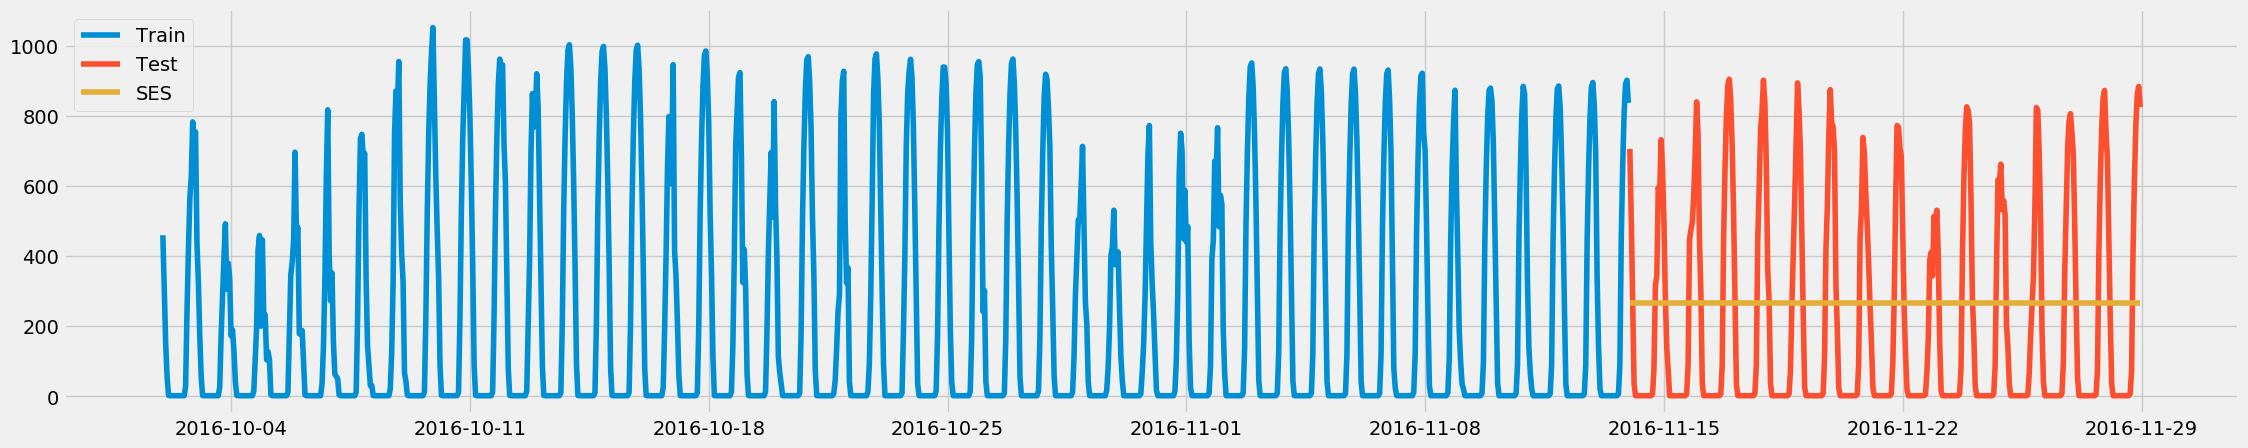

In [36]:
y_hat_avg2 = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(_train['Radiation'])).fit(smoothing_level=0.02,optimized=False)
y_hat_avg2['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(25,5))
plt.plot(_train['Radiation'], label='Train')
plt.plot(valid['Radiation'], label='Test')
plt.plot(y_hat_avg2['SES'], label='SES')
plt.legend(loc='best')
plt.show()

####  ** Error RMS for Simple Exponentian Smoothing**

In [37]:
rms = sqrt(mean_squared_error(valid.Radiation, y_hat_avg2.SES))
print("Error: ", rms)

Error:  299.6229177777205


### **Holt Winter**


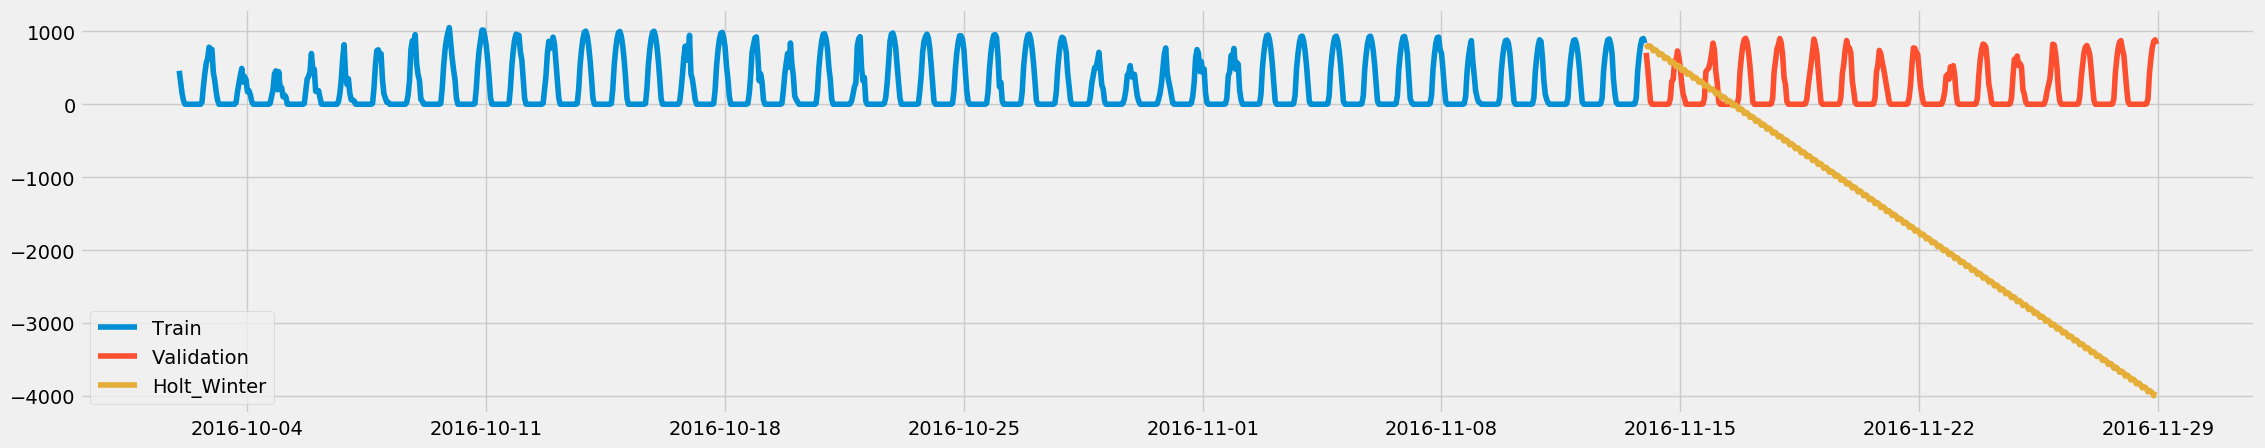

In [38]:
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(_train['Radiation']), seasonal_periods=4, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize = (25,5))
plt.plot(_train.index, _train['Radiation'],label = 'Train')
plt.plot(valid.index, valid['Radiation'], label = 'Validation')
plt.plot(y_hat_avg.index, y_hat_avg['Holt_Winter'], label = 'Holt_Winter')
plt.legend(loc = 'best')

####  ** Error RMS for Holt Winter**

In [39]:
rms = sqrt(mean_squared_error(valid.Radiation, y_hat_avg.Holt_Winter))
print("error: ", rms)

error:  2302.117805464011


### **SARIMAX & ARIMA**

The ARIMA forecast for a stationary time series is no more than a linear equation (like a linear regression). The predictors depend on the parameters (p, d, q) of the ARIMA model:

   - ** Number of AR terms (autoregressive) (p): ** AR terms are only delays of the dependent variable. For example, if p is 5, the predictors for x (t) will be x (t-1) ... .x (t-5).
   - ** Number of MA terms (moving average) (q): ** MA terms are delayed forecast errors in the prediction equation. For example, if q is 5, the predictors for x (t) will be e (t-1) ... .e (t-5) where e (i) is the difference between the moving average at the instantaneous moment and the real value.
   - ** Number of differences (d): ** are the number of non-seasonal differences, that is, in this case we take the difference of first order.
   
   Source: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

#### ACF and PACF Plots
** How do we determine p, d and q? ** For p and q, we can use ACF and PACF graphs (below).

** Autocorrelation function (ACF) **. Correlation between the time series with a delayed version of itself.

** Partial autocorrelation function (PACF) **. Additional correlation explained by each successive lagged term.

** How do we interpret the ACF and PACF graphs? **

- p - Delay value where the PACF graph crosses the upper confidence interval for the first time.
- q - Delay value where the ACF graph crosses the upper confidence interval for the first time.

In [40]:
def plot_acf_pacf(df, ts):
  """
  Plot auto-correlation function (ACF) and partial auto-correlation (PACF) plots
  """
  f, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 5)) 

  #Plot ACF: 

  ax1.plot(lag_acf)
  ax1.axhline(y=0,linestyle='--',color='gray')
  ax1.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax1.set_title('Autocorrelation Function for %s' %(ts))

  #Plot PACF:
  ax2.plot(lag_pacf)
  ax2.axhline(y=0,linestyle='--',color='gray')
  ax2.axhline(y=-1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.axhline(y=1.96/np.sqrt(len(df[ts])),linestyle='--',color='gray')
  ax2.set_title('Partial Autocorrelation Function for %s' %(ts))
  
  plt.tight_layout()
  plt.show()
  plt.close()
  
  return

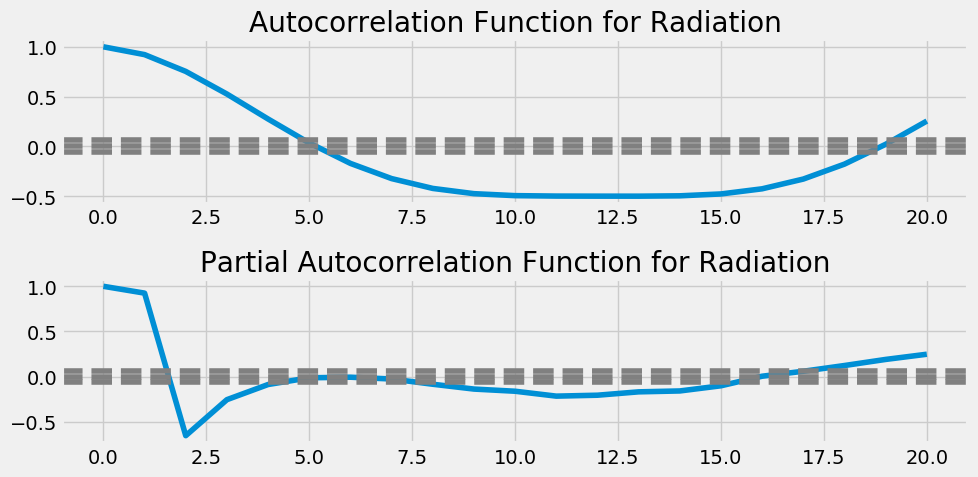

In [41]:
lag_acf = acf(np.array(_train['Radiation']), nlags = 20)
lag_pacf = pacf(np.array(_train['Radiation']), nlags = 20, method='ols')

plot_acf_pacf(df = _train, ts = 'Radiation')

### **Conclusions**

As seen in the PACF chart, the largest amount of partial correlation is between 1 and 0, so ** p has a value of 1 **

The same happens in the ACF chart, so ** has a value of 1 **.

### **SARIMAX(1,0,1)**

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


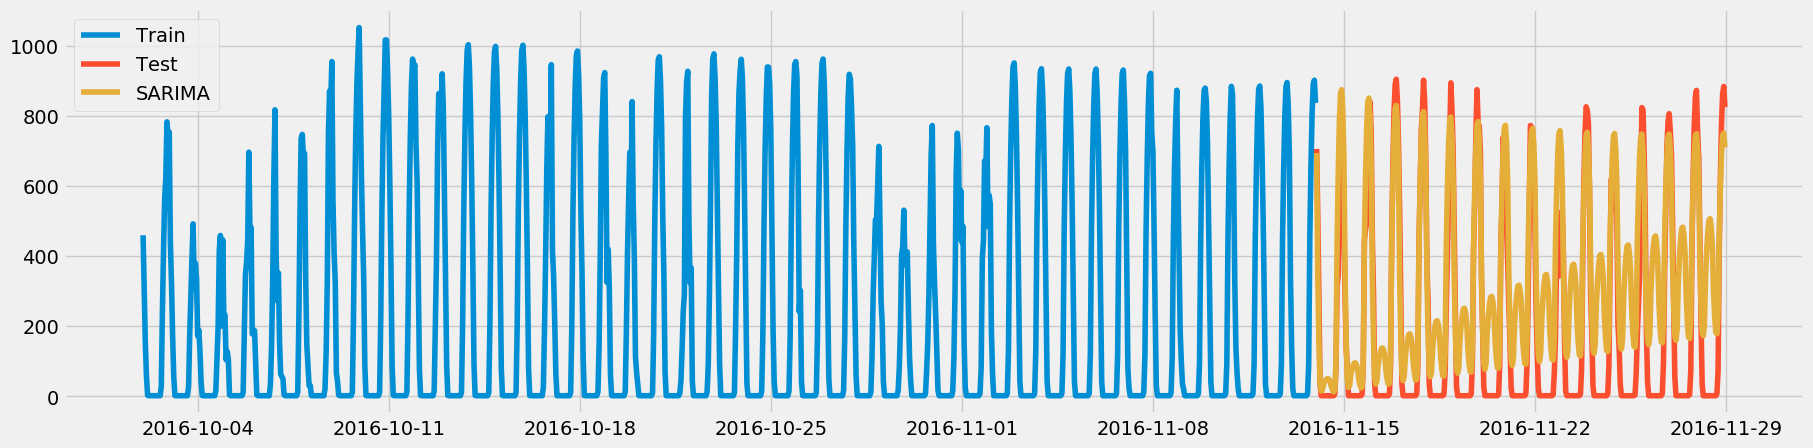

In [42]:
fit2 = sm.tsa.statespace.SARIMAX(_train.Radiation, order=(1,0,1),seasonal_order=(1,1,0,12), trend='ct')
res = fit2.fit()
y_hat_avg['SARIMA'] = res.predict(start="2016-11-14", end="2016-11-29", dynamic=True)
plt.figure(figsize=(20,5))
plt.plot( _train['Radiation'], label='Train')
plt.plot(valid['Radiation'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')

In [43]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Radiation   No. Observations:                 1032
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 12)   Log Likelihood               -5955.709
Date:                            Thu, 08 Feb 2024   AIC                          11923.419
Time:                                    20:43:27   BIC                          11952.984
Sample:                                10-02-2016   HQIC                         11934.645
                                     - 11-13-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1979      6.203     -0.032      0.975     -12.356      11.961
drift          0.0032      0.009      0.338      0.735      -0.015       0.022
ar.L1          0.6686      0.027     24.401      0.000       0.615       0.722
ma.L1         -0.1298      0.036     -3.606      0.000      -0.200      -0.059
ar.S.L12      -0.9568      0.018    -52.246      0.000      -0.993      -0.921
sigma2      7744.9933    225.404     34.360      0.000    7303.209    8186.777
===================================================================================
Ljung-Box (Q):                      267.84   Jarque-Bera (JB):              2908.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.28
Prob(H) (two-sided):                  0.77   Kurtosis:                        11.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
rms = sqrt(mean_squared_error(valid.Radiation, y_hat_avg['SARIMA']))
print('Error:', rms)

Error: 190.80099432184105


In [45]:
#res.plot_predict(1,1592)
y=res.forecast(steps=320)
y

2016-11-14 00:00:00    694.457658
2016-11-14 01:00:00    348.043872
2016-11-14 02:00:00    154.604637
2016-11-14 03:00:00     36.144956
2016-11-14 04:00:00     14.900046
2016-11-14 05:00:00     17.158747
2016-11-14 06:00:00     32.013466
2016-11-14 07:00:00     40.209822
2016-11-14 08:00:00     46.274343
2016-11-14 09:00:00     49.614646
2016-11-14 10:00:00     49.916907
2016-11-14 11:00:00     47.005116
2016-11-14 12:00:00     40.742723
2016-11-14 13:00:00     25.744791
2016-11-14 14:00:00     17.355835
2016-11-14 15:00:00     12.213659
2016-11-14 16:00:00     16.398273
2016-11-14 17:00:00     96.426163
2016-11-14 18:00:00    446.105757
2016-11-14 19:00:00    641.449028
2016-11-14 20:00:00    784.697354
2016-11-14 21:00:00    864.893812
2016-11-14 22:00:00    875.347521
2016-11-14 23:00:00    813.232028
2016-11-15 00:00:00    675.778624
2016-11-15 01:00:00    343.686291
2016-11-15 02:00:00    158.247825
2016-11-15 03:00:00     44.691217
2016-11-15 04:00:00     24.553985
2016-11-15 05:

### **ARIMA(1,0,1)**

                      Radiation    year     ...          SARIMA       ARIMA
Timestamp                                   ...                            
2016-11-14 00:00:00  706.186667  2016.0     ...      694.457658  679.476887
2016-11-14 01:00:00  513.421667  2016.0     ...      348.043872  479.808937
2016-11-14 02:00:00  269.996667  2016.0     ...      154.604637  277.625848
2016-11-14 03:00:00   36.060000  2016.0     ...       36.144956  104.168886
2016-11-14 04:00:00    1.212500  2016.0     ...       14.900046  -16.827484
2016-11-14 05:00:00    1.214167  2016.0     ...       17.158747  -76.827749
2016-11-14 06:00:00    1.206667  2016.0     ...       32.013466  -83.548813
2016-11-14 07:00:00    1.197500  2016.0     ...       40.209822  -56.772981
2016-11-14 08:00:00    1.197500  2016.0     ...       46.274343  -21.573136
2016-11-14 09:00:00    1.199167  2016.0     ...       49.614646   -0.471922
2016-11-14 10:00:00    1.202500  2016.0     ...       49.916907   -6.582829
2016-11-14 1

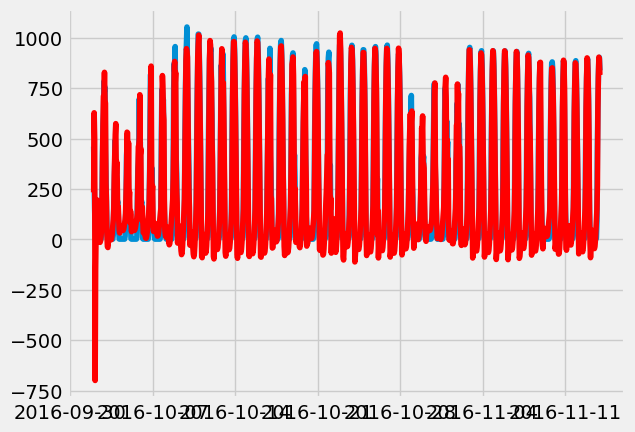

In [46]:
model = ARIMA(_train.Radiation, order=(6, 0, 3))  
results_MA = model.fit()
y_hat_avg['ARIMA'] = results_MA.predict(start="2016-11-14", end="2016-11-29", dynamic=True)
print(y_hat_avg)
plt.plot(_train.Radiation)
plt.plot(results_MA.fittedvalues, color='red')

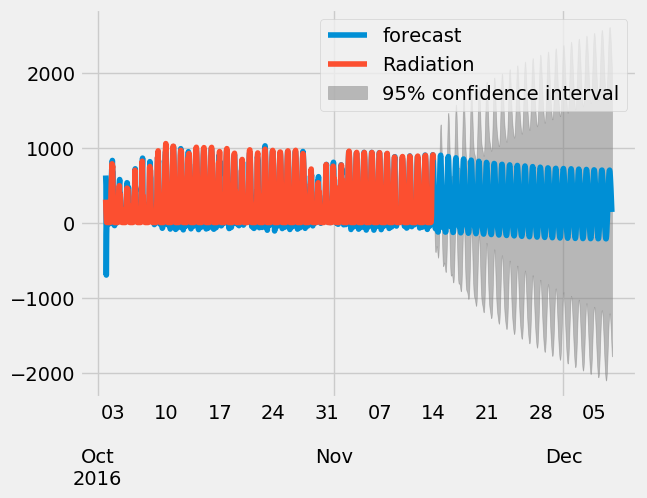

In [47]:
results_MA.plot_predict(1,1592)
x=results_MA.forecast(steps=120)

In [48]:
results_MA.summary()

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Radiation   No. Observations:                 1032
Model:                     ARMA(6, 3)   Log Likelihood                     nan
Method:                       css-mle   S.D. of innovations             77.416
Date:                Thu, 08 Feb 2024   AIC                                nan
Time:                        20:43:29   BIC                                nan
Sample:                    10-02-2016   HQIC                               nan
                         - 11-13-2016                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             233.1461      0.001   2.17e+05      0.000     233.144     233.148
ar.L1.Radiation     3.5173   3.21e-05   1.09e+05      0.000       3.517       3.517
ar.L2.Radiation    -4.9403        nan        nan        nan         nan         nan
ar.L3.Radiation     3.3650      0.000   2.71e+04      0.000       3.365       3.365
ar.L4.Radiation    -1.1693   7.31e-05   -1.6e+04      0.000      -1.169      -1.169
ar.L5.Radiation     0.3336   3.94e-06   8.47e+04      0.000       0.334       0.334
ar.L6.Radiation    -0.1291    3.1e-06  -4.17e+04      0.000      -0.129      -0.129
ma.L1.Radiation    -2.4934      0.104    -24.075      0.000      -2.696      -2.290
ma.L2.Radiation     2.2546      0.193     11.686      0.000       1.876       2.633
ma.L3.Radiation    -0.7075      0.105     -6.743      0.000      -0.913      -0.502
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9663           -0.2573j            1.0000           -0.0414
AR.2            0.9663           +0.2573j            1.0000            0.0414
AR.3            0.8699           -0.5010j            1.0039           -0.0832
AR.4            0.8699           +0.5010j            1.0039            0.0832
AR.5           -0.5445           -2.7181j            2.7721           -0.2815
AR.6           -0.5445           +2.7181j            2.7721            0.2815
MA.1            0.9142           -0.4525j            1.0201           -0.0731
MA.2            0.9142           +0.4525j            1.0201            0.0731
MA.3            1.3584           -0.0000j            1.3584           -0.0000
-----------------------------------------------------------------------------
"""

In [49]:
rms = sqrt(mean_squared_error(valid.Radiation, y_hat_avg['ARIMA']))
print('Error:', rms)

Error: 159.01270150423414


### Finally
We include a seasonal effect in an additive way, which means that we add a term that allows the process to depend on the fourth MA delay. It may be that, on the contrary, we want to model a seasonal effect in a multiplicative way. We often write the model then as ARIMA (p, d, q) × (P, D, Q) s, where the letters of low intensity indicate the specification for the non-seasonal component, and uppercase letters indicate the specification of the Season component s is the periodicity of the stations (for example, it is often 4 for quarterly data or 12 for monthly data).

As it says above, it was used as parameter 12, since it is a monthly data